<a href="https://colab.research.google.com/github/Arnabsaha6/Machine-Learning/blob/master/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Load Data

In [2]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/Arnabsaha6/Machine-Learning/master/Churn_Modelling.xls',index_col='RowNumber')

##Understanding the data

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
num_col = churn_data.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = churn_data.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical columns: 
 Index(['Surname', 'Geography', 'Gender'], dtype='object')


#**Data Preprocessing**

In [7]:
## let's drop few columns which won't contribute to the model using domain knowldedge.
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [8]:
# Let's do one hot encoding for the column `Geo` as Logistic Regression model would be expecting numeric features
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [9]:
# Rather than using one hot encoding we can do label encoding as well. Here let's use replace function rather than label encoder
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [10]:
churn_data_encoded = Gender_dummies
churn_data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


#**Exploratory Data Analysis**

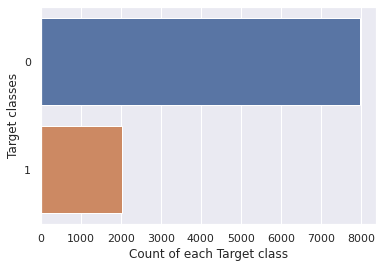

In [11]:
# Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

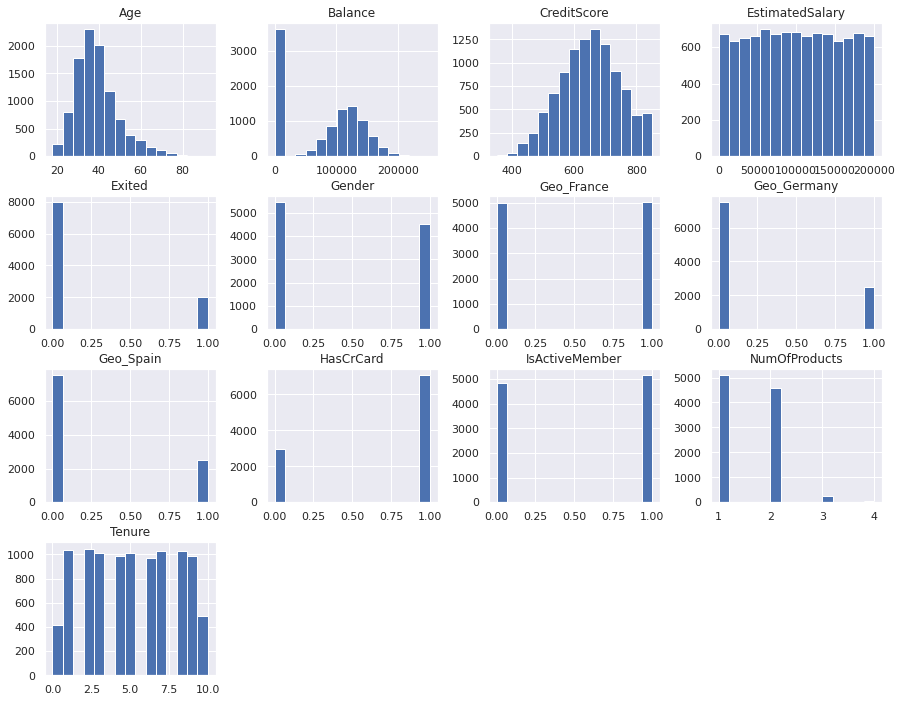

In [12]:
# Check the distribution of all the features

churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

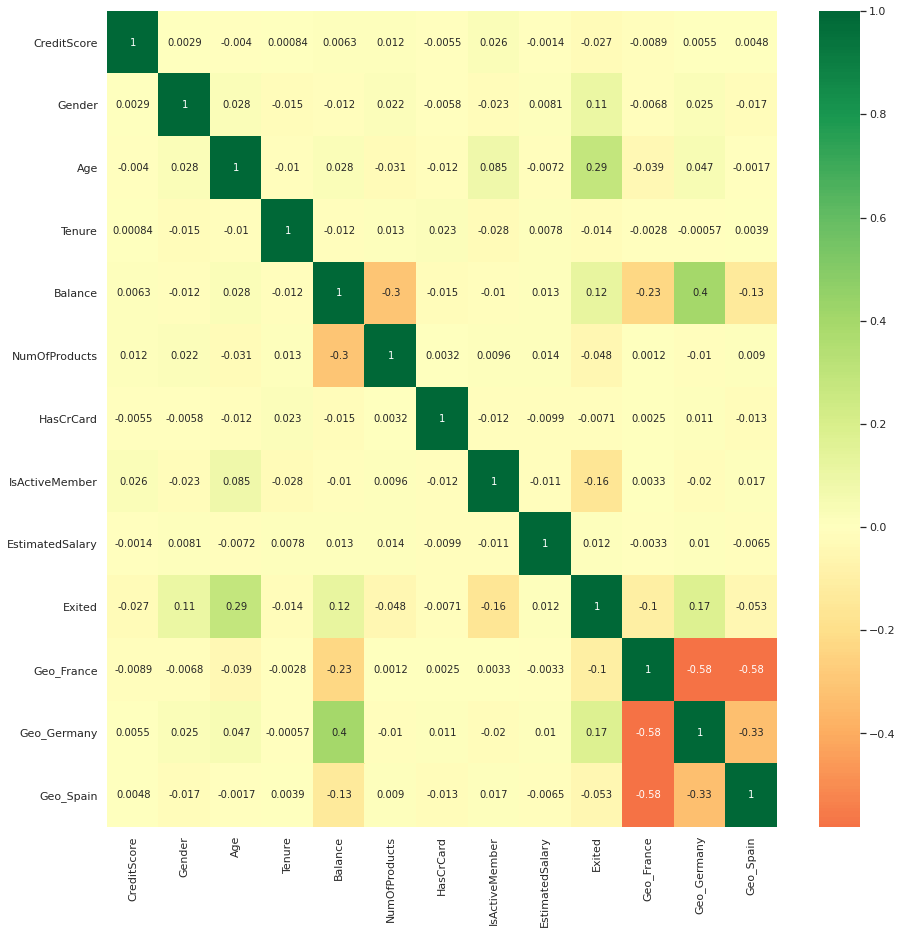

In [13]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0)

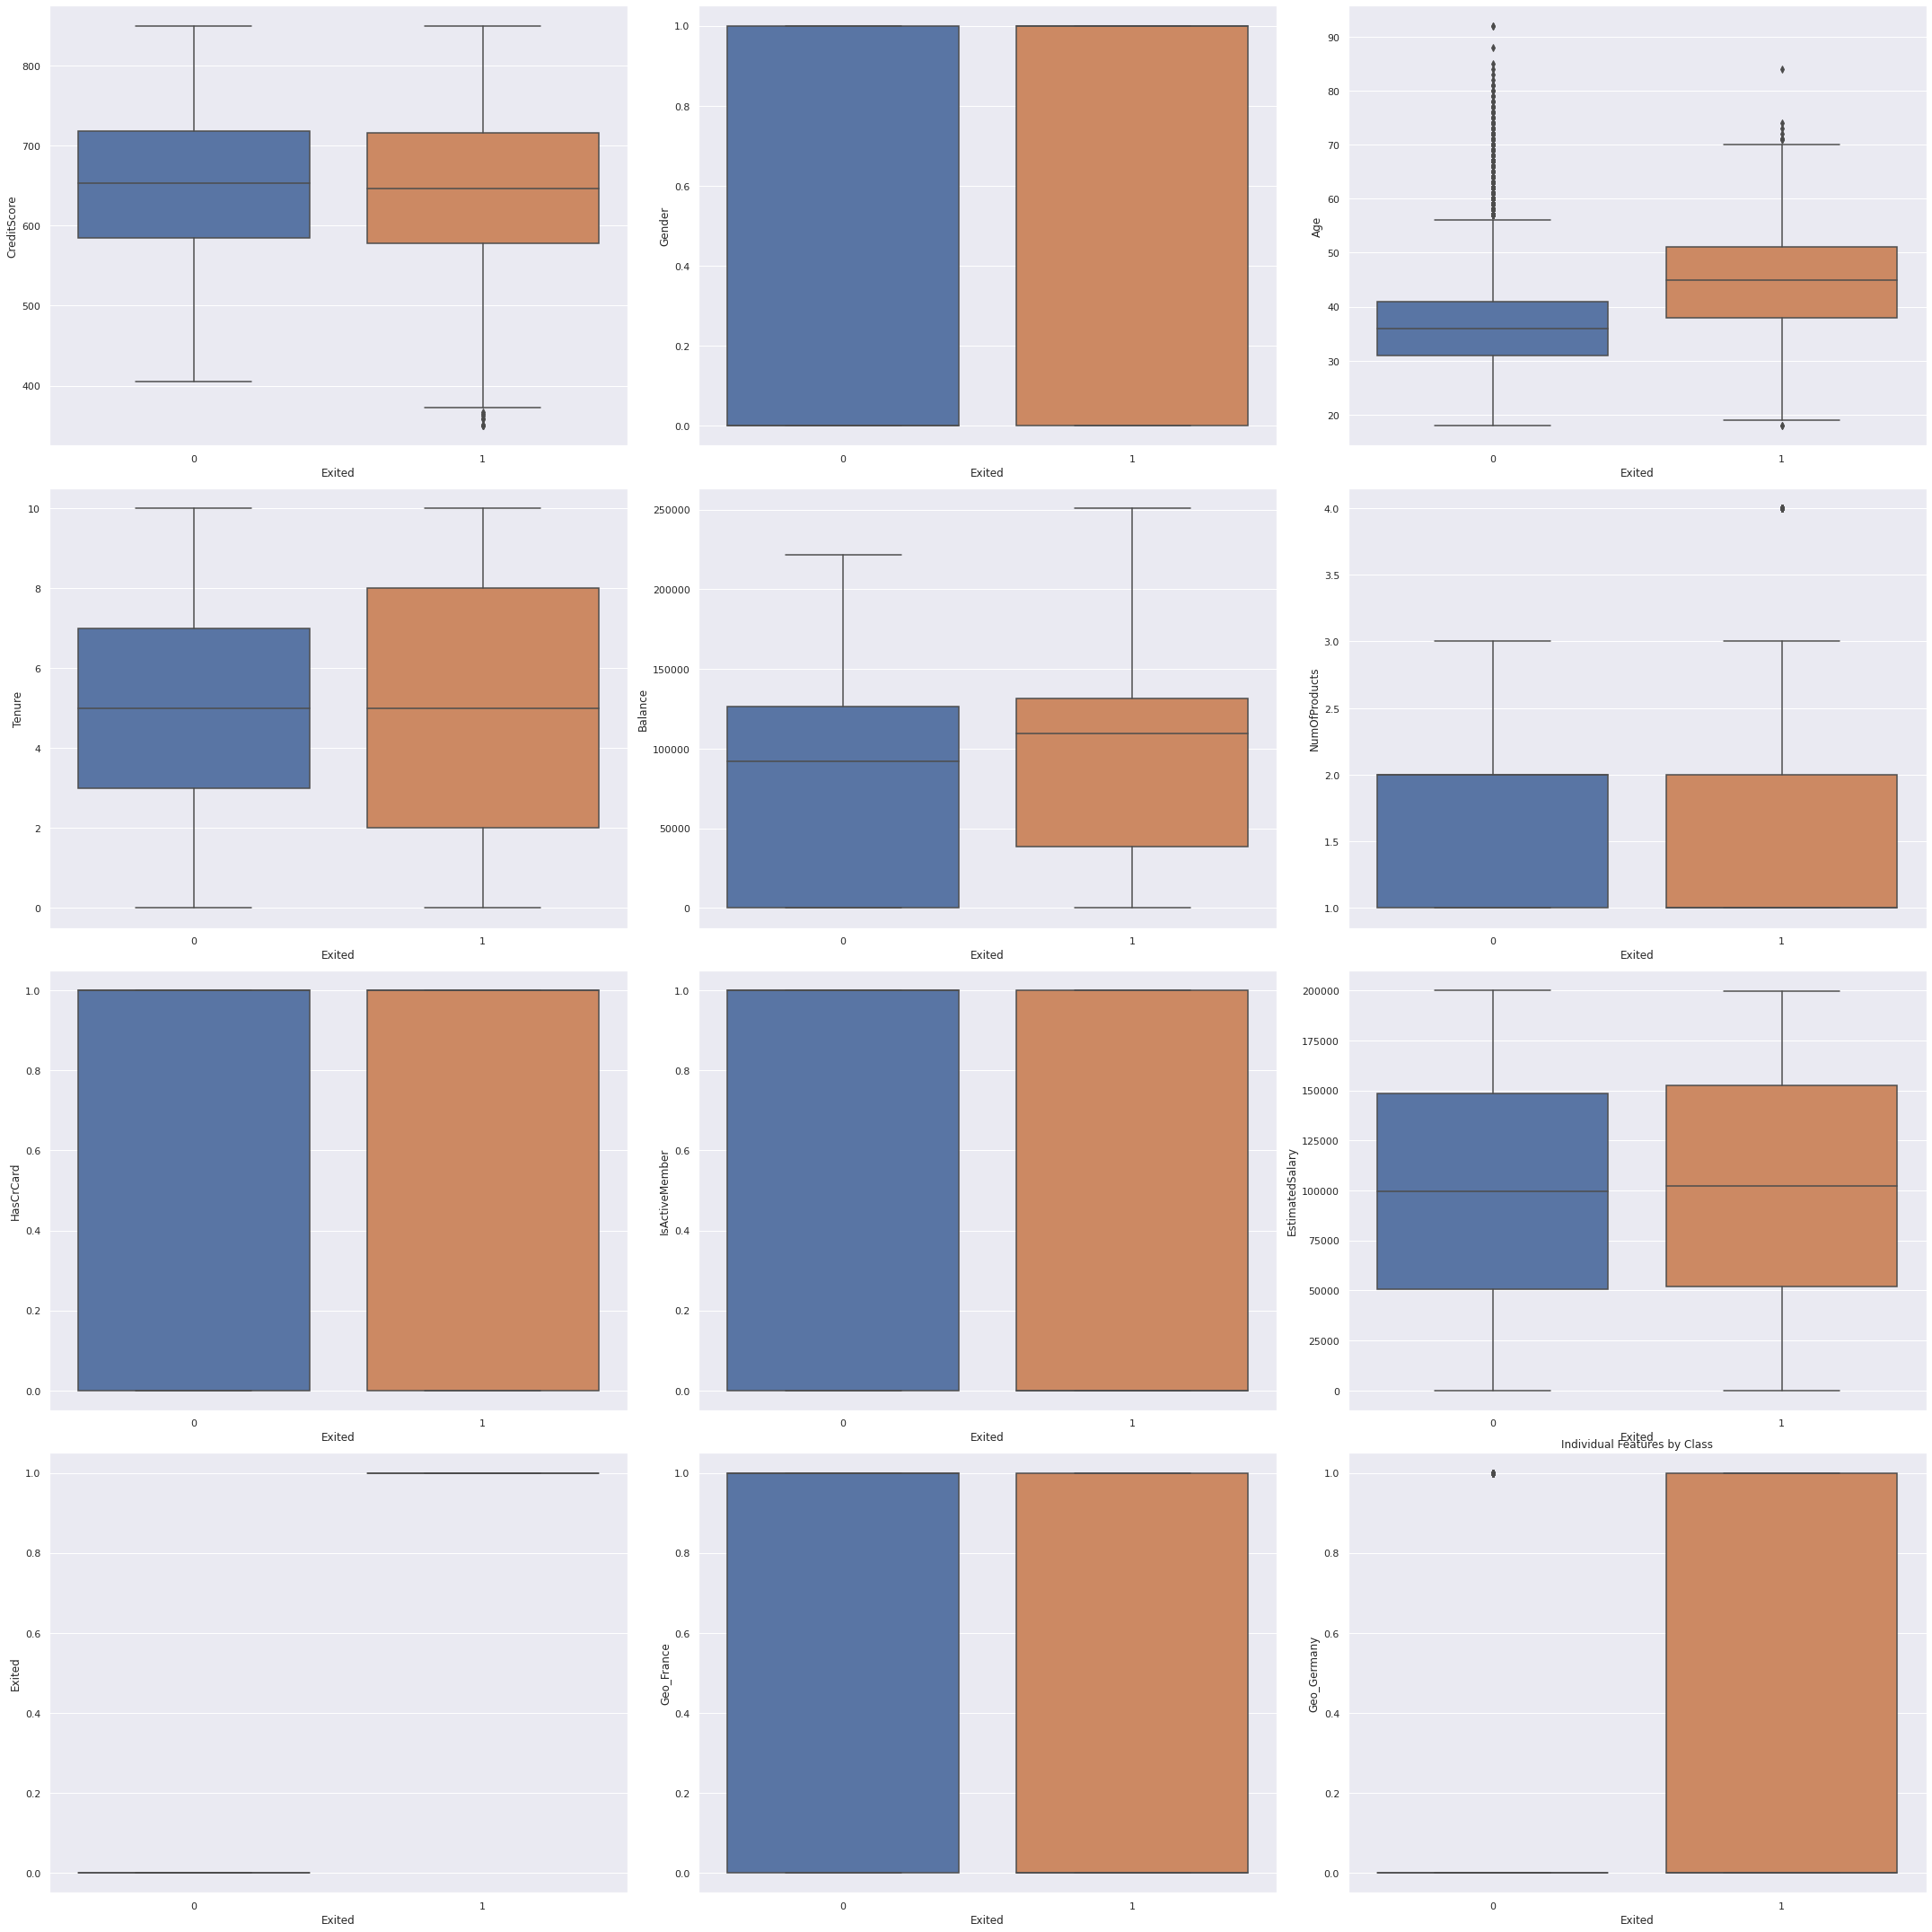

In [14]:
# Let's check the distribution of y variable corresponding to every feature/x variable 

fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

##Model Building

In [15]:
# Split the y variable series and x variables dataset

X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [17]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Logistic Regression Classification**


In [18]:
#Define the model
lr = LogisticRegression()
# Training the model:
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)
y_pred0

array([0, 0, 0, ..., 0, 1, 0])

##**1. Accuracy**


In [20]:
# Checking the performance of logistic regression model
score_lr = lr.score(X_test, y_test)
print(score_lr)

0.8075757575757576


##**2. Confusion Metric**

In [21]:
actual = y_test
predicted = y_pred0
results = confusion_matrix(actual, predicted)
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[2511  106]
 [ 529  154]]


##**Summary**

The rows in the confusion matrix are the count of predicted 0’s and 1’s (from y_pred0), while, the columns are the actuals (from y_test).
So, you have 2511 out of 3040 0 instances predicted as 0 and 154 out of 260 1 instances predicted as 1 . This is good.
Secondly, look at the 106 in top-right of the table. This means the model predicted 106 instance as 0 which were actually 1 .
This is a classic case of False Negative or Type II error . You want to avoid this at all costs, because, it says the customer is with us when he/she has churned
out.
Also, the model predicted 529 instances as 1 when the real value is 0 . This is called False Positive or Type I error . This condition should also be avoided but
in this case is not as dangerous as Type II error

##**3. Accuracy Precision Recall F1 Score**

In [22]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2617
           1       0.59      0.23      0.33       683

    accuracy                           0.81      3300
   macro avg       0.71      0.59      0.61      3300
weighted avg       0.78      0.81      0.77      3300



##**4. ROC curve**
Often, choosing the best model is sort of a balance between predicting the one's accurately or the zeroes accurately. In other words sensitivity and specificity.
But it would be great to have something that captures both these aspects in one single metric.
This is nicely captured by the 'Receiver Operating Characteristics' curve, also called as the ROC curve. In fact, the area under the ROC curve can be used as an evaluation
metric to compare the efficacy of the models.


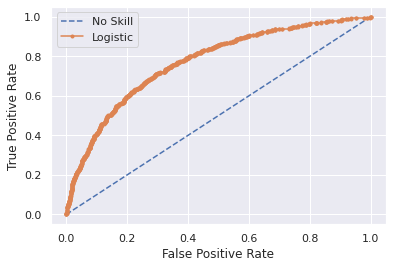

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = lr.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

##**Summary**
Interpreting the ROC plot is very different from a regular line plot. Because, though there is an X and a Y-axis, you don't read it as: for an X value of 0.25, the Y value is .9.
Instead, what we have here is a line that traces the probability cutoff from 1 at the bottom-left to 0 in the top right.
This is a way of analyzing how the sensitivity and specificity perform for the full range of probability cutoffs, that is from 0 to 1.
Ideally, if you have a perfect model, all the events will have a probability score of 1 and all non-events will have a score of 0. For such a model, the area under the ROC will
be a perfect 1.
So, if we trace the curve from bottom left, the value of probability cutoff decreases from 1 towards 0. If you have a good model, more of the real events should be predicted
as events, resulting in high sensitivity and low FPR. In that case, the curve will rise steeply covering a large area before reaching the top-right.
Therefore, the larger the area under the ROC curve, the better is your model.

##**5. AUC**
The area under ROC curve is known as AUC, it's values goes from 0.5 to 1, if somehow the value is less that 0.5, that means we are predicting in the wrong direction and we
can alter the prediction outputs, hence the AUC would be 1 - AUC initial, now it would be greater than 0.5


In [24]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.770


##**6. Handel Class Imbalance**

In [25]:
from imblearn.over_sampling import RandomOverSampler
X = churn_data_encoded.drop(['Exited'], axis = 1)
y = churn_data_encoded.Exited
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

In [27]:
def classification_model(x,y,class_weight=None):
  # Splitting the dataset into the Training set and Test set
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

 # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
 sc = StandardScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)

 # Defining the model
 lr = LogisticRegression(class_weight = class_weight)
 # Training the model:
 lr.fit(X_train, y_train)
 # Predicting target values by using x_test and our model:
 y_pred0 = lr.predict(X_test)
 lr_probs = lr.predict_proba(X_test)

 results = confusion_matrix(y_test, y_pred0)
 print ('Confusion Matrix :')
 print(results)
 print ('Accuracy Score :',accuracy_score(y_test, y_pred0) )
 print ('Report : ')
 print (classification_report(y_test, y_pred0))